In [406]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import random

In [407]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [408]:
def reverse(array):
  revArr = []
  for x in array:
    revX = []
    for xi in x:
      if (xi == 1.0):
        revX.append(0)
      else:
        revX.append(1)
    revArr.append(revX)
  return revArr

In [409]:
def get_img(path):
  test_img = Image.open(path)
  test_img = test_img.resize((100, 100))
  plt.subplot(5, 5, i)
  plt.imshow(test_img, cmap = "gray")
  test_img = test_img.convert('1')
  test_x = np.array(test_img, np.float32)
  test_x = test_x.reshape([-1, 10000])
  return test_x

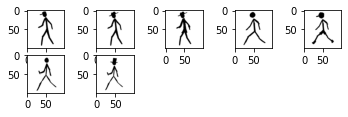

In [410]:
x_train = []
y_train = []
  
path = '/content/drive/My Drive/Walk/'
for i in range(1, 8):
  x_train.append(get_img(path + str(i) +'.jpg')[0])
  y_train.append(1)

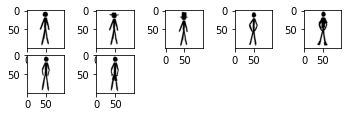

In [411]:
path = '/content/drive/My Drive/Stand/'
for i in range(11, 18):
  x_train.append(get_img(path + str(i) +'.jpg')[0])
  y_train.append(-1)

In [412]:
x_train = reverse(x_train)

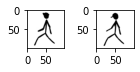

In [413]:
x_test = []
y_test = []

path = '/content/drive/My Drive/Walk/'
for i in range(8, 10):
  x_test.append(get_img(path + str(i) +'.jpg')[0])
  y_test.append(1)

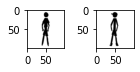

In [414]:
path = '/content/drive/My Drive/Stand/'
for i in range(18, 20):
  x_test.append(get_img(path + str(i) +'.jpg')[0])
  y_test.append(-1)

In [415]:
x_test = reverse(x_test)

In [416]:
def add_bias_feature(a):
    a_extended = np.zeros((a.shape[0],a.shape[1]+1))
    a_extended[:,:-1] = a
    a_extended[:,-1] = int(1)
    return a_extended

def linear_func(w, x):
  return np.dot(w, x)

def polinom_func(w, x):
  return np.dot(w, x) ** 2

def polinomh_func(w, x):
  return (np.dot(w, x) + 1) ** 2

class MySVM():
    def __init__(self, etha=0.0001, alpha=0.0001, epochs=100, kernel = "linear"):
        self._epochs = epochs
        self._etha = etha
        self._alpha = alpha
        self._w = None
        self.train_errors = None
        self.kernel = kernel
        self.kernel_funcs = {
            'linear': linear_func,
            'polinom': polinom_func,
            'polinomh' : polinomh_func
        }

    def fit(self, X_train, Y_train):
        X_train = add_bias_feature(X_train)
        self._w = np.random.normal(loc=0, scale=0.05, size=X_train.shape[1])
        train_errors = []

        for epoch in range(self._epochs): 
            tr_err = 0
            tr_loss = 0
            for i, x in enumerate(X_train):
                margin = Y_train[i] * np.dot(self._w, X_train[i])
                if margin >= 1:
                    self._w -= self._etha * self._alpha * self._w / self._epochs
                else:
                    self._w += self._etha*(Y_train[i] * X_train[i] - self._alpha * self._w / self._epochs)
                    tr_err += 1
            train_errors.append(tr_err)  
        self.train_errors = np.array(train_errors)

    def predict(self, X:np.array) -> np.array:
        y_pred = []
        X_extended = add_bias_feature(X)
        for i in range(len(X_extended)):
            y_pred.append(np.sign(self.kernel_funcs[self.kernel](self._w, X_extended[i])))
        return np.array(y_pred)

    def hinge_loss(self, x, y):
        return max(0,1 - y*self.kernel_funcs[self.kernel](x, self._w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self._alpha*np.dot(self._w, self._w)

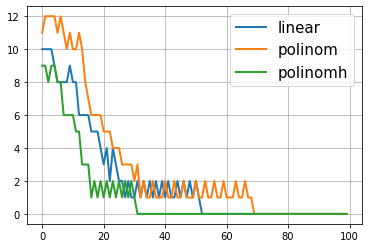

In [417]:
kernels = ['linear','polinom','polinomh']
for k in kernels:
  svm = MySVM(kernel = k)
  svm.fit(np.array(x_train), np.array(y_train))
  plt.plot(svm.train_errors, linewidth=2, label = k)
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [418]:
svm = MySVM(kernel = 'linear')
svm.fit(np.array(x_train), np.array(y_train))
y_pred = svm.predict(np.array(x_test))
print(y_pred)

[ 1.  1. -1. -1.]


In [419]:
def minus_to_zero(x):
  if x < 0:
    return 0
  return 1

acc:1.0


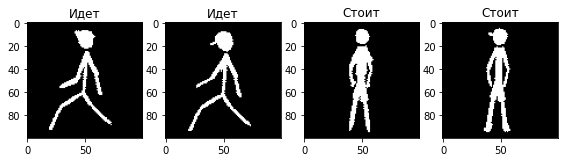

In [420]:
acc = accuracy_score(y_test, y_pred)
print("acc:" + str(acc))
ress = ['Стоит', 'Идет']
plt.figure(figsize=(12, 5))
for i in range(4):
  plt.subplot(2, 5, i + 1)
  plt.title(ress[minus_to_zero(y_pred[i])])
  img = np.reshape((x_test[i]), [100, 100])
  plt.imshow(img, cmap="gray")